In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as met
import matplotlib.pyplot as plt
import sklearn.model_selection as ms

In [2]:
df= pd.read_csv('Adult_TrainDataset.csv')
df2= pd.read_csv('Adult_TestDataset.csv')

In [3]:
#df

In [4]:
#df2

In [5]:
df.describe()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df2.describe()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work_Class        32561 non-null  object
 2   Final_Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-Number  32561 non-null  int64 
 5   Marital_Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital_Gain      32561 non-null  int64 
 11  Capital_Loss      32561 non-null  int64 
 12  Hours-Per-Week    32561 non-null  int64 
 13  Native_Country    32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               16281 non-null  int64 
 1   Work_Class        16281 non-null  object
 2   Final_Weight      16281 non-null  int64 
 3   Education         16281 non-null  object
 4   Education-Number  16281 non-null  int64 
 5   Marital_Status    16281 non-null  object
 6   Occupation        16281 non-null  object
 7   Relationship      16281 non-null  object
 8   Race              16281 non-null  object
 9   Sex               16281 non-null  object
 10  Capital_Gain      16281 non-null  int64 
 11  Capital_Loss      16281 non-null  int64 
 12  Hours-Per-Week    16281 non-null  int64 
 13  Native_Country    16281 non-null  object
 14  Income            16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


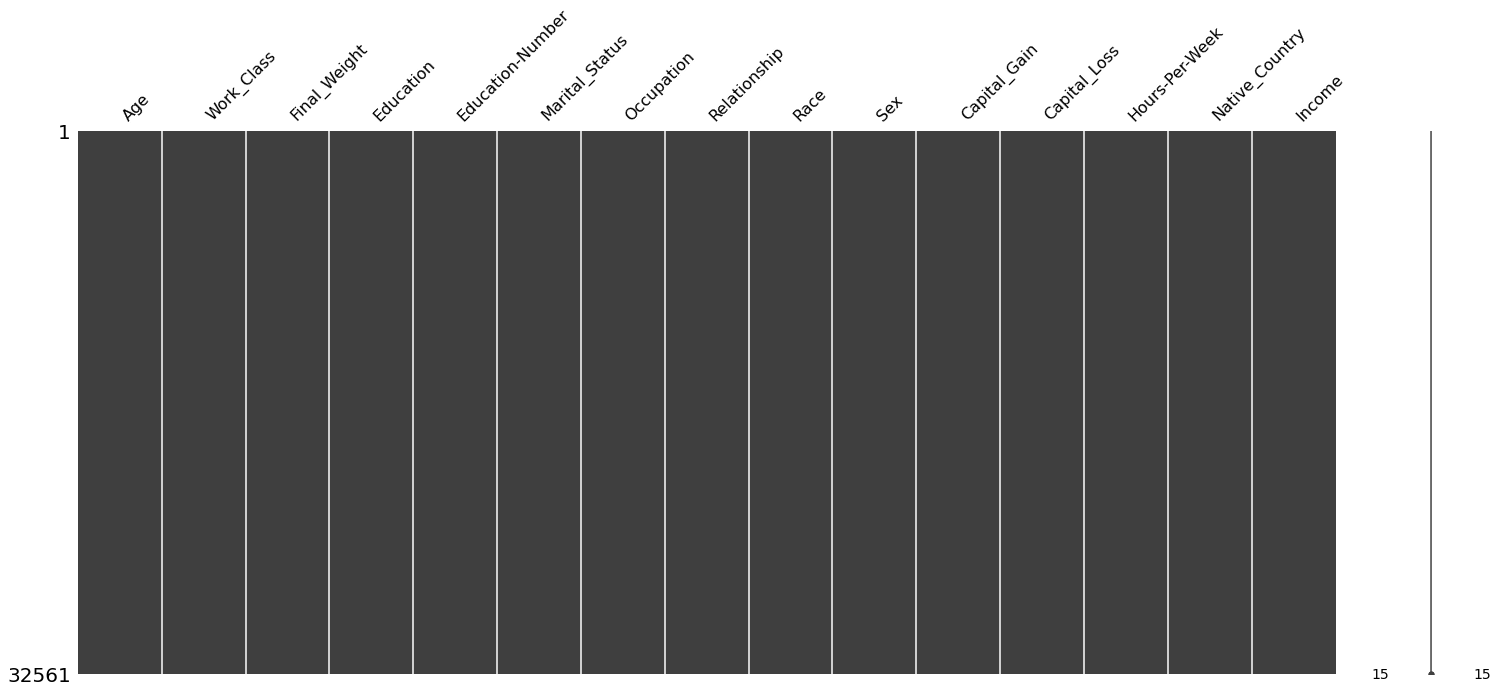

<Figure size 432x288 with 0 Axes>

In [9]:
import missingno as msno
msno.matrix(df)
plt.figure()
plt.show()

In [10]:
df = df.replace (' ?' , np.nan)
df2 = df2.replace (' ?' , np.nan)

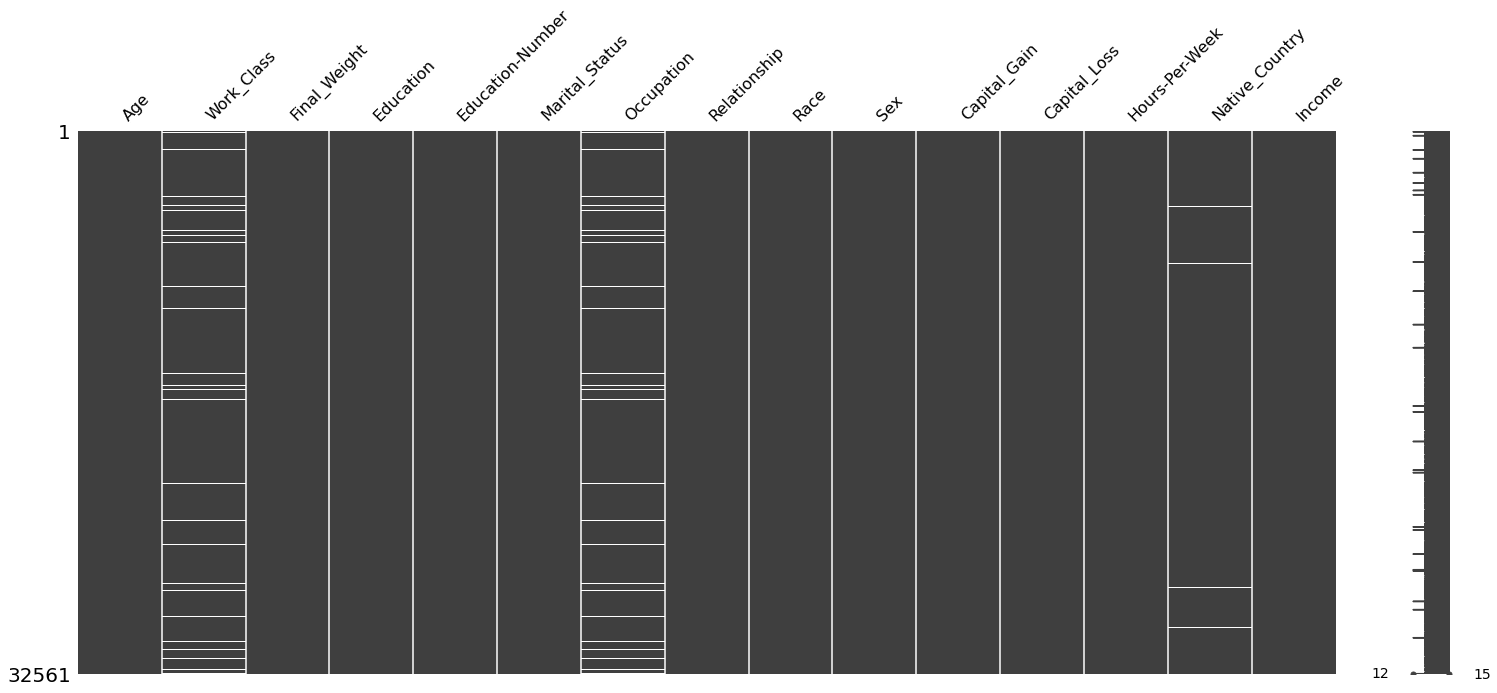

<Figure size 432x288 with 0 Axes>

In [11]:
msno.matrix(df)
plt.figure()
plt.show()

In [12]:
count_nan = len(df) - df.count()
#count_nan

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [14]:
#label_encoder = LabelEncoder()
#imputerw = df.Work_Class
#imputerw = label_encoder.fit_transform(imputerw)
#imputerw[0:65]

In [15]:
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp_mean.fit([df])
#SimpleImputer()
#X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
#print(imp_mean.transform(X))

In [16]:
#imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
#imputer.fit(df.Work_Class)
#SimpleImputer()
#X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
#print(imp_mean.transform(X))
#missing_values = np.nan

cols = ['Work_Class', 'Occupation', 'Native_Country']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df2[cols] = df2[cols].apply(LabelEncoder().fit_transform)
#
#
#
df2.head(5)
df.describe()

,Age,Work_Class,Final_Weight,Education-Number,Occupation,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.376371,1.897784e+05,10.080679,6.421762,1077.648844,87.303830,40.437456,36.470870
std,13.640433,1.582038,1.055500e+05,2.572720,4.328619,7385.292085,402.960219,12.347429,6.083092
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,3.000000,0.000000,0.000000,40.000000,38.000000
50%,37.000000,3.000000,1.783560e+05,10.000000,6.000000,0.000000,0.000000,40.000000,38.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,10.000000,0.000000,0.000000,45.000000,38.000000
max,90.000000,8.000000,1.484705e+06,16.000000,14.000000,99999.000000,4356.000000,99.000000,41.000000


In [17]:
from sklearn.impute import SimpleImputer

# Imputer object using the mean strategy and
# missing_values type for imputation

imputer = SimpleImputer(missing_values = 8 ,strategy ='mean')
 
# Fitting the data to the imputer object
#df.Work_Class = imputer.fit_transform(df['Work_Class'].values.reshape(-1,1))[:,0]

df.Work_Class = imputer.fit_transform(df['Work_Class'].values.reshape(-1,1))
df2.Work_Class = imputer.fit_transform(df2['Work_Class'].values.reshape(-1,1))

#df.Occupation = imputer.fit_transform(df['Occupation'].values.reshape(-1,1))
#preprocessor = (SimpleImputer(missing_values = 8,strategy='mode', fill_value=-1), numerical_cols)
# Imputing the data    
#data = imputer.transform(data)

df.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,6.0,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,38,<=50K
1,50,5.0,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,38,<=50K
2,38,3.0,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,38,<=50K
3,53,3.0,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,38,<=50K
4,28,3.0,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,4,<=50K


In [18]:
imputer = SimpleImputer(missing_values = 14,strategy ='mean')
df.Occupation = imputer.fit_transform(df['Occupation'].values.reshape(-1,1))
df2.Occupation = imputer.fit_transform(df2['Occupation'].values.reshape(-1,1))
df.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,6.0,77516,Bachelors,13,Never-married,0.0,Not-in-family,White,Male,2174,0,40,38,<=50K
1,50,5.0,83311,Bachelors,13,Married-civ-spouse,3.0,Husband,White,Male,0,0,13,38,<=50K
2,38,3.0,215646,HS-grad,9,Divorced,5.0,Not-in-family,White,Male,0,0,40,38,<=50K
3,53,3.0,234721,11th,7,Married-civ-spouse,5.0,Husband,Black,Male,0,0,40,38,<=50K
4,28,3.0,338409,Bachelors,13,Married-civ-spouse,9.0,Wife,Black,Female,0,0,40,4,<=50K


In [19]:
imputer = SimpleImputer(missing_values = 41 ,strategy ='mean')
df.Native_Country = imputer.fit_transform(df['Native_Country'].values.reshape(-1,1))
df2.Native_Country = imputer.fit_transform(df2['Native_Country'].values.reshape(-1,1))
df.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,6.0,77516,Bachelors,13,Never-married,0.0,Not-in-family,White,Male,2174,0,40,38.0,<=50K
1,50,5.0,83311,Bachelors,13,Married-civ-spouse,3.0,Husband,White,Male,0,0,13,38.0,<=50K
2,38,3.0,215646,HS-grad,9,Divorced,5.0,Not-in-family,White,Male,0,0,40,38.0,<=50K
3,53,3.0,234721,11th,7,Married-civ-spouse,5.0,Husband,Black,Male,0,0,40,38.0,<=50K
4,28,3.0,338409,Bachelors,13,Married-civ-spouse,9.0,Wife,Black,Female,0,0,40,4.0,<=50K


In [20]:
#tabdile sotune hayi ke float shode be int
df['Native_Country'] = df['Native_Country'].astype(int)
df['Work_Class'] = df['Work_Class'].astype(int)
df['Occupation'] = df['Occupation'].astype(int)

df2['Native_Country'] = df2['Native_Country'].astype(int)
df2['Work_Class'] = df2['Work_Class'].astype(int)
df2['Occupation'] = df2['Occupation'].astype(int)


df2.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,25,3,226802,11th,7,Never-married,6,Own-child,Black,Male,0,0,40,37,<=50K.
1,38,3,89814,HS-grad,9,Married-civ-spouse,4,Husband,White,Male,0,0,50,37,<=50K.
2,28,1,336951,Assoc-acdm,12,Married-civ-spouse,10,Husband,White,Male,0,0,40,37,>50K.
3,44,3,160323,Some-college,10,Married-civ-spouse,6,Husband,Black,Male,7688,0,40,37,>50K.
4,18,3,103497,Some-college,10,Never-married,6,Own-child,White,Female,0,0,30,37,<=50K.


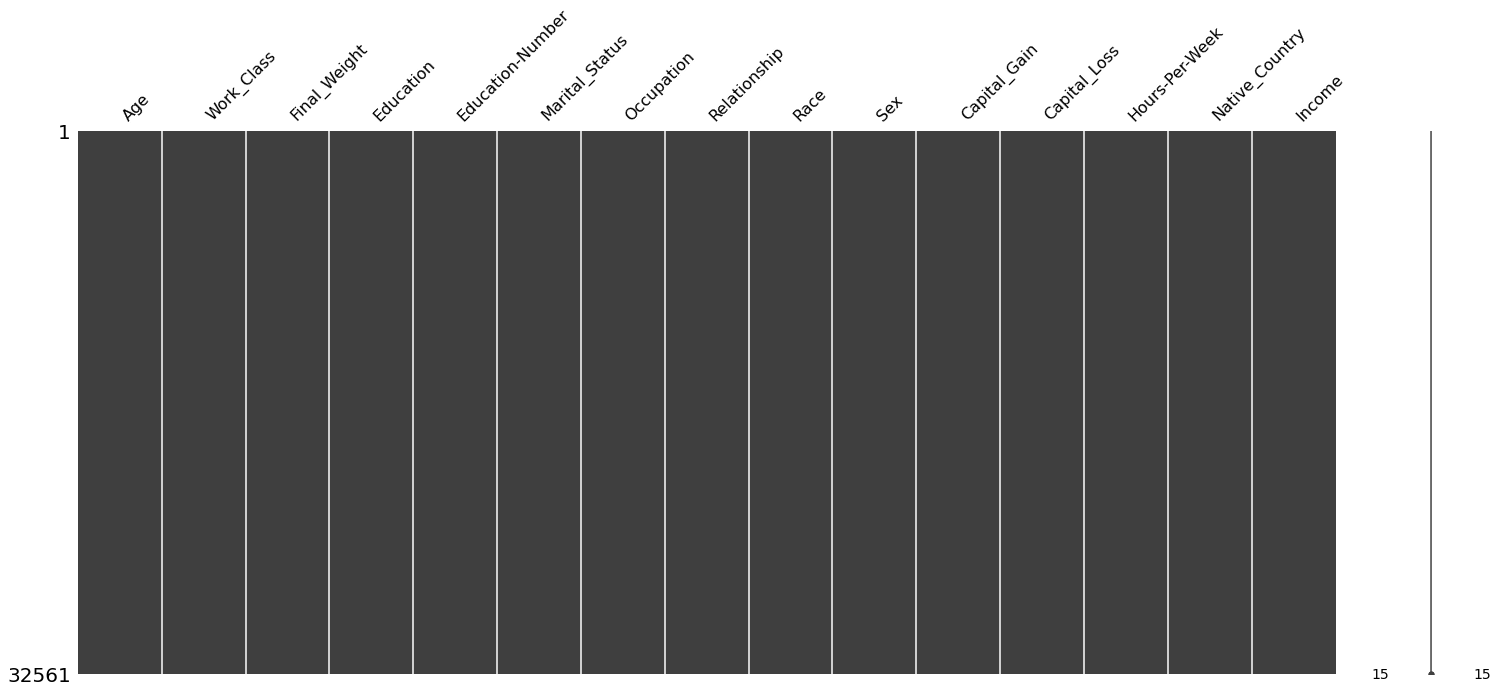

<Figure size 432x288 with 0 Axes>

In [21]:
msno.matrix(df)
plt.figure()
plt.show()

In [22]:
count_nan = len(df) - df.count()
count_nan

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

In [23]:
df['Income'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

In [24]:
df2['Income'].value_counts()

 <=50K.    12435
 >50K.      3846
Name: Income, dtype: int64

In [25]:
df.columns

Index(['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education-Number',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week', 'Native_Country',
       'Income'],
      dtype='object')

In [26]:
xdf= df.columns
xdf= xdf.drop('Income')
xdf

Index(['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education-Number',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week', 'Native_Country'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#for column in xdf:
#    xdf.column = labelencoder.fit_transform(xdf)

#transformer = make_column_transformer((labelencoder(), ['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education-Number',
#       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
#       'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week', 'Native_Country']), remainder='passthrough')
#transformed = transformer.fit_transform(df_dim)
#transformed_df = pd.DataFrame( transformed, columns=transformer.get_feature_names())

#df = transformed_df
#df

#xdf = labelencoder.fit_transform(xdf)
#xdf

In [28]:
#('Age', 'Work_Class', 'Final_Weight', 'Education', 'Education-Number',
#       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
#    'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week', 'Native_Country','Income')

labelencoder = LabelEncoder()
#x_color = df_dim.color
#y_color = label_encoder.fit_transform(x_color)
#y_color

transformer = labelencoder.fit_transform
df.Education = transformer(df.Education)
df.Marital_Status = transformer(df.Marital_Status)
df.Relationship = transformer(df.Relationship)
df.Race = transformer(df.Race)
df.Sex = transformer(df.Sex)
df.Income = transformer(df.Income)

df2.Education = transformer(df2.Education)
df2.Marital_Status = transformer(df2.Marital_Status)
df2.Relationship = transformer(df2.Relationship)
df2.Race = transformer(df2.Race)
df2.Sex = transformer(df2.Sex)
df2.Income = transformer(df2.Income)

df.head(10)

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
6,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
7,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1
8,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1


In [29]:
# تبدیل ستون های ایکس به array
# مناسب استفاده کتابخانه سایکیت لرن
# زیرا سایکیت لرن با پانداس کار نمیکند 
# با نامپای کار میکند
x_train= df[['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education-Number',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week', 'Native_Country']].values
x_test= df2[['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education-Number',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week', 'Native_Country']].values
print(x_train[0:3])
print(x_test[0:3])

[[    39      6  77516      9     13      4      0      1      4      1
    2174      0     40     38]
 [    50      5  83311      9     13      2      3      0      4      1
       0      0     13     38]
 [    38      3 215646     11      9      0      5      1      4      1
       0      0     40     38]]
[[    25      3 226802      1      7      4      6      3      2      1
       0      0     40     37]
 [    38      3  89814     11      9      2      4      0      4      1
       0      0     50     37]
 [    28      1 336951      7     12      2     10      0      4      1
       0      0     40     37]]


In [30]:
y_train=df[['Income']].values
y_test= df2[['Income']].values
print(y_train[0:10])
print(y_test[0:10])

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [31]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x_train = scaler.fit(x_train).transform(x_train)
x_test= scaler.transform(x_test)
x_test[0:3]

array([[-0.99570562, -0.08529633,  0.35077413, -2.40251115, -1.19745882,
         0.92163395,  0.02237865,  0.96694656, -1.96262077,  0.70307135,
        -0.14592048, -0.21665953, -0.03542945,  0.10221634],
       [-0.04264203, -0.08529633, -0.94709543,  0.18133163, -0.42005962,
        -0.4062122 , -0.48825297, -0.90018084,  0.39366753,  0.70307135,
        -0.14592048, -0.21665953,  0.77446821,  0.10221634],
       [-0.77576787, -1.89169231,  1.39436215, -0.85220548,  0.74603917,
        -0.4062122 ,  1.0436419 , -0.90018084,  0.39366753,  0.70307135,
        -0.14592048, -0.21665953, -0.03542945,  0.10221634]])

In [32]:
y_train = scaler.fit(y_train).transform(y_train)
y_test = scaler.transform(y_test)
print(y_train[0:10])
print(y_test[0:10])

[[-0.56319851]
 [-0.56319851]
 [-0.56319851]
 [-0.56319851]
 [-0.56319851]
 [-0.56319851]
 [-0.56319851]
 [ 1.77557289]
 [ 1.77557289]
 [ 1.77557289]]
[[-0.56319851]
 [-0.56319851]
 [ 1.77557289]
 [ 1.77557289]
 [-0.56319851]
 [-0.56319851]
 [-0.56319851]
 [ 1.77557289]
 [-0.56319851]
 [-0.56319851]]


In [33]:
#[x,y]

In [34]:
# bi fayde
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0, random_state=42)
#y= y.reshape(-1, 1)
#.fit(x,np.ravel(y,order="c"))
#model.fit(x,np.ravel(y))

#y = y.ravel()
#x = x.ravel()
#model.fit(x.reshape(-1, 1),y.reshape(-1, 1))

In [35]:
y_train = np.array(df['Income'].values.tolist())
y_test = np.array(df2['Income'].values.tolist())

In [36]:
#[df.Age, df.Work_Class, df.Final_Weight, df.Education,
#       df.Education-Number, df.Marital_Status, df.Occupation, df.Relationship,
#       df.Race, df.Sex, df.Capital_Gain, df.Capital_Loss, df.Hours-Per-Week,
#       df.Native_Country]
#y =  np.array(x.values.tolist())
#x = x.tolist()

In [37]:
type(x_train)

numpy.ndarray

In [38]:
x_train = x_train.tolist()
x_test = x_test.tolist()

In [39]:
#x.shape()

In [40]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

32561
32561
16281
16281


In [41]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
k=4
model = KNeighborsClassifier(n_neighbors=k)
knn = model.fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [42]:
yhat= knn.predict(x_test)
print(yhat[0:10])
y_test[0:10]

[0 0 0 1 0 0 0 1 0 0]


array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [43]:
from sklearn import metrics
print(metrics.accuracy_score(y_train ,knn.predict(x_train)))
print(metrics.accuracy_score(y_test ,yhat))

0.8779521513467031
0.827590442847491


In [44]:
ks=40
mean_acc= np.zeros((ks-1))
std_acc=np.zeros((ks-1))

for n in range (1,ks): 
    model= KNeighborsClassifier(n_neighbors= n).fit(x_train ,y_train)    
    yhat= model.predict(x_test)   
    mean_acc[n-1]= metrics.accuracy_score(y_test ,yhat) #y test
    std_acc[n-1]= np.std( yhat== y_test)/np.sqrt(yhat.shape[0])   #y test
    
    
mean_acc

array([0.79528285, 0.81935999, 0.82089552, 0.82759044, 0.82943308,
       0.83336404, 0.83287267, 0.834961  , 0.8369879 , 0.83692648,
       0.8358209 , 0.83606658, 0.83717216, 0.83692648, 0.83655795,
       0.83864627, 0.8387077 , 0.83895338, 0.83926049, 0.83981328,
       0.83932191, 0.83969044, 0.83950617, 0.83926049, 0.83950617,
       0.83919907, 0.83883054, 0.8390148 , 0.83907622, 0.83944475,
       0.8390148 , 0.83889196, 0.83907622, 0.83981328, 0.83852343,
       0.83876912, 0.83778638, 0.83717216, 0.8369879 ])

In [45]:
natije = ([0.79528285, 0.81935999, 0.82089552, 0.82759044, 0.82943308,
       0.83336404, 0.83287267, 0.834961  , 0.8369879 , 0.83692648,
       0.8358209 , 0.83606658, 0.83717216, 0.83692648, 0.83655795,
       0.83864627, 0.8387077 , 0.83895338, 0.83926049, 0.83981328,
       0.83932191, 0.83969044, 0.83950617, 0.83926049, 0.83950617,
       0.83919907, 0.83883054, 0.8390148 , 0.83907622, 0.83944475,
       0.8390148 , 0.83889196, 0.83907622, 0.83981328, 0.83852343,
       0.83876912, 0.83778638, 0.83717216, 0.8369879 ])

In [46]:
natije.sort()
natije[-1]
# k=35 : max accuracy

0.83981328

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat)
#, average='weighted' :0.83

0.6161411628579693

In [48]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, yhat, average='macro')
#(0.7821956340457636, 0.739194952599069, 0.7563316544171319, None) macro

(0.7821956340457636, 0.739194952599069, 0.7563316544171319, None)

In [49]:
from sklearn.metrics import confusion_matrix
conf_mtrx= confusion_matrix(y_test, yhat)
conf_mtrx

array([[11497,   938],
       [ 1716,  2130]], dtype=int64)

<AxesSubplot:>

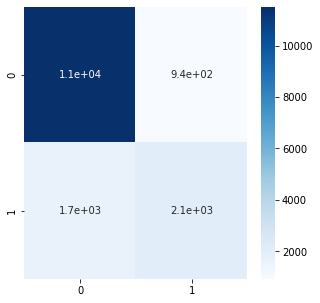

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
#df_cm = pd.DataFrame(conf_mtrx, range(2), range(2))
# plt.figure(figsize=(10,7))
#sns.set(font_scale=1.4) # for label size
#sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

#plt.show()
#print(f"{a:f}")
df_cm = pd.DataFrame(conf_mtrx, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (5,5))
#sns.color_palette("coolwarm") #, as_cmap=True)
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.55      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281

Confusion matrix, without normalization
[[11497   938]
 [ 1716  2130]]


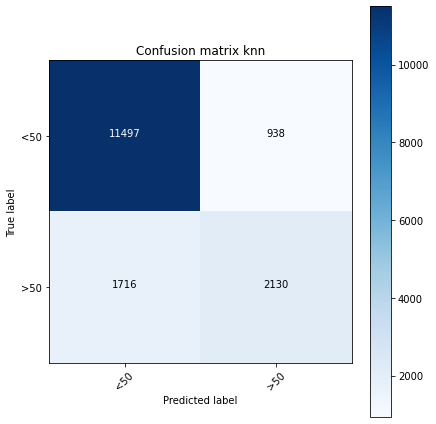

In [83]:
# Compute confusion matrix
cnf_matrix_knn = confusion_matrix(y_test, yhat) #, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure(figsize= [6,6])
plot_confusion_matrix(cnf_matrix_knn, classes=['<50','>50'], title='Confusion matrix knn')

In [51]:
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
#X = x_train
#y = y_train
#from sklearn.svm import SVC
#clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#clf.fit(X, y)
#pip=Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('svc', SVC(gamma='auto'))])
#pip

In [52]:
#pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])


#pip.fit(x_train, y_train)
#pip.score(x_test, y_test)

In [53]:
#pip.predict(x_test)

In [54]:
from sklearn import svm
from sklearn.svm import SVC
#deafult kernel is rbf
clf= svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [55]:
y_pred= clf.predict(x_test)
print(y_pred[0:5])
print(y_test[0:5])

[0 0 0 1 0]
[0 0 1 1 0]


In [56]:
precision_recall_fscore_support(y_test, y_pred, average='weighted')
#(0.8285840788297646, 0.8369879000061421, 0.8302887904653873, None) ba yhat

(0.8433122225215791, 0.8508691112339537, 0.8418136618851498, None)

In [57]:
#‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernels:
    clf= svm.SVC(kernel= i)
    clf.fit(x_train,y_train)
    y_pred= clf.predict(x_test)
    print('for', i ,"kernel prediction is:")
    print(y_pred[0:10])
    print(y_test[0:10])
    print('and the precision_recall_fscore_support is:')
    print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
    


for linear kernel prediction is:
[0 0 0 1 0 0 0 1 0 0]
[0 0 1 1 0 0 0 1 0 0]
and the precision_recall_fscore_support is:
(0.8059707736434705, 0.8133407038879675, 0.7807145427943394, None)
for poly kernel prediction is:
[0 0 0 0 0 0 0 1 0 0]
[0 0 1 1 0 0 0 1 0 0]
and the precision_recall_fscore_support is:
(0.8370197028982741, 0.8452183526810393, 0.8338820682834082, None)
for rbf kernel prediction is:
[0 0 0 1 0 0 0 1 0 0]
[0 0 1 1 0 0 0 1 0 0]
and the precision_recall_fscore_support is:
(0.8433122225215791, 0.8508691112339537, 0.8418136618851498, None)
for sigmoid kernel prediction is:
[0 0 0 1 0 0 0 1 0 0]
[0 0 1 1 0 0 0 1 0 0]
and the precision_recall_fscore_support is:
(0.7553992499654358, 0.7572630673791536, 0.7563090143906123, None)


              precision    recall  f1-score   support

           0       0.84      0.84      0.84     12435
           1       0.49      0.48      0.48      3846

    accuracy                           0.76     16281
   macro avg       0.66      0.66      0.66     16281
weighted avg       0.76      0.76      0.76     16281

Confusion matrix, without normalization
[[10502  1933]
 [ 2019  1827]]


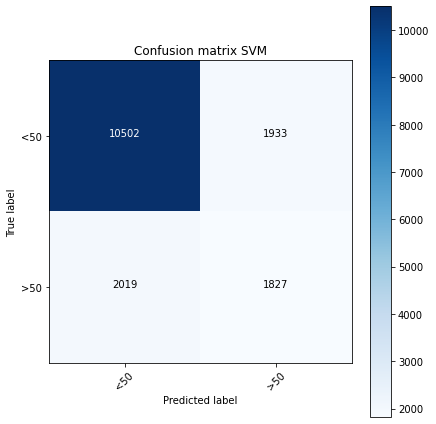

In [82]:
cnf_matrix_svm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrix_svm , classes=['<50','>50'] ,  title='Confusion matrix SVM')

In [76]:
from sklearn.naive_bayes import GaussianNB
#naivebayes = GaussianNB()

nb= GaussianNB().fit(x_train, y_train)
y_pred_nb= nb.predict(x_test)
print(y_test[0:10])
print(y_pred_nb[0:10])

[0 0 1 1 0 0 0 1 0 0]
[0 0 0 1 0 0 0 1 0 0]


In [58]:
import math
for i in range (3,15):
    nb= GaussianNB(var_smoothing= i*(math.e)-9 ).fit(x_train, y_train)
    y_pred_nb= nb.predict(x_test)
    print(precision_recall_fscore_support(y_test, y_pred_nb, average='weighted'))


c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\sklearn\naive_bayes.py:452: RuntimeWarning: invalid value encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5833503014311704, 0.7637737239727289, 0.6614797504945593, None)
(0.772313892122559, 0.7846569621030649, 0.7245454398816772, None)
(0.8071319962378656, 0.7710828573183466, 0.6794566318071685, None)
(0.8198803532066709, 0.7689331122166944, 0.6736266182921432, None)
(0.822638122013989, 0.768994533505313, 0.6736593981838401, None)
(0.822638122013989, 0.768994533505313, 0.6736593981838401, None)
(0.822638122013989, 0.768994533505313, 0.6736593981838401, None)
(0.8220593785193069, 0.7680117928874147, 0.6713997598804033, None)
(0.5833503014311704, 0.7637737239727289, 0.6614797504945593, None)


c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5833503014311704, 0.7637737239727289, 0.6614797504945593, None)
(0.5833503014311704, 0.7637737239727289, 0.6614797504945593, None)
(0.5833503014311704, 0.7637737239727289, 0.6614797504945593, None)


c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.68      0.35      0.46      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.65      0.67     16281
weighted avg       0.79      0.81      0.78     16281

Confusion matrix, without normalization
[[11799   636]
 [ 2515  1331]]


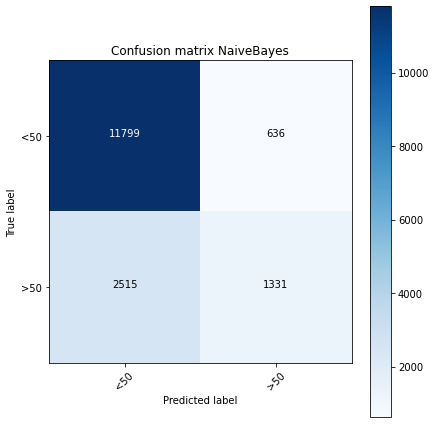

In [85]:
cnf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
np.set_printoptions(precision=2)

print(classification_report(y_test, y_pred_nb))

# Plot non-normalized confusion matrix
plt.figure(figsize =[6,6])
plot_confusion_matrix(cnf_matrix_nb , classes=['<50','>50'] ,  title='Confusion matrix NaiveBayes')

In [60]:
support_vector_indices = clf.support_
support_vector_indices

array([    0,     1,    28, ..., 32536, 32545, 32557])

In [61]:
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[4080 4080]


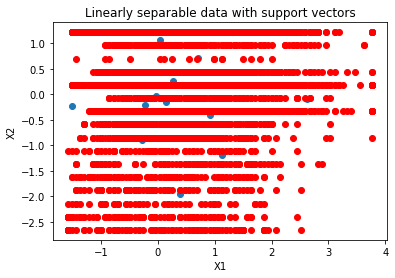

In [89]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(x_train[0], x_train[3])
plt.scatter(support_vectors[:,0], support_vectors[:,3], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [87]:
print(y_pred_nb[0:20])
print(y_test[0:20])

[0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0]
[0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1]


In [ ]:
# قسمت (مصور سازی پایین) که فرصت نشد یاد بگیرم ! فقط با استفاده از کد های موجود شبیه سازی کردم

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [69]:
# Plotting decision region
#plot_decision_regions((x_train).values , (y_train).values , clf=knn, legend=2)

In [113]:
import plotly.express as px
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [112]:
from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
import plotly.graph_objects as go
import numpy as np

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Explanatory k-NN plot'),
    dcc.Graph(id="graph"),
    html.P("Select number of neighbors:"),
    dcc.Slider(
        id='slider-neighbors',
        min=5, max=20, step=1, value=12,
        marks={i: str(i) for i in range(5,21,5)})
])


@app.callback(
    Output("graph", "figure"), 
    Input("slider-neighbors", "value"))
def train_and_display_model(k):
    X, y = make_moons(noise=0.3, random_state=0) # replace with your own data source
    xrange, yrange = build_range(X, y)
    xx, yy = np.meshgrid(xrange, yrange)
    test_input = np.c_[xx.ravel(), yy.ravel()]

    clf = KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)
    Z = clf.predict_proba(test_input)[:, 1]
    Z = Z.reshape(xx.shape)
    fig = build_figure(X, y, Z, xrange, yrange)

    return fig


# ############ HELPER FUNCTIONS ############
def build_range(X, y, mesh_size=.02, margin=.25):
    """
    Create an x range and a y range for building meshgrid
    """
    x_min = X[:, 0].min() - margin
    x_max = X[:, 0].max() + margin
    y_min = X[:, 1].min() - margin
    y_max = X[:, 1].max() + margin

    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    return xrange, yrange


def build_figure(X, y, Z, xrange, yrange):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y.astype(str), test_size=0.25, random_state=0)

    trace_specs = [
        [X_train, y_train, '0', 'Train', 'square'],
        [X_train, y_train, '1', 'Train', 'circle'],
        [X_test, y_test, '0', 'Test', 'square-dot'],
        [X_test, y_test, '1', 'Test', 'circle-dot']
    ]

    fig = go.Figure(data=[
        go.Scatter(
            x=X[y==label, 0], y=X[y==label, 1],
            name=f'{split}, y={label}',
            mode='markers', marker_symbol=marker
        )
        for X, y, label, split, marker in trace_specs
    ])
    fig.update_traces(
        marker_size=12, marker_line_width=1.5,
        marker_color="lightyellow"
    )

    fig.add_trace(
        go.Contour(
            x=xrange, y=yrange, z=Z,
            showscale=False, colorscale='RdBu',
            opacity=0.4, name='Score', hoverinfo='skip'
        )
    )

    return fig

In [93]:
# test classification dataset
from sklearn.datasets import make_classification
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
	models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
	models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
	models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
	models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

In [94]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn1'] = KNeighborsClassifier(n_neighbors=1)
	models['knn3'] = KNeighborsClassifier(n_neighbors=3)
	models['knn5'] = KNeighborsClassifier(n_neighbors=5)
	models['knn7'] = KNeighborsClassifier(n_neighbors=7)
	models['knn9'] = KNeighborsClassifier(n_neighbors=9)
	models['hard_voting'] = get_voting()
	return models

In [95]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>knn1 0.873 (0.030)
>knn3 0.889 (0.038)
>knn5 0.895 (0.031)
>knn7 0.899 (0.035)
>knn9 0.900 (0.033)
>hard_voting 0.902 (0.034)


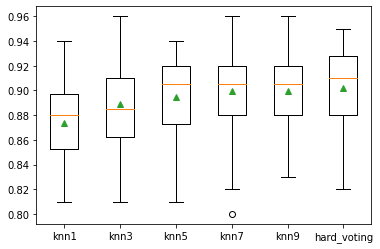

In [96]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
	return X, y

# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
	models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
	models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
	models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
	models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn1'] = KNeighborsClassifier(n_neighbors=1)
	models['knn3'] = KNeighborsClassifier(n_neighbors=3)
	models['knn5'] = KNeighborsClassifier(n_neighbors=5)
	models['knn7'] = KNeighborsClassifier(n_neighbors=7)
	models['knn9'] = KNeighborsClassifier(n_neighbors=9)
	models['hard_voting'] = get_voting()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [102]:
from sklearn.datasets.samples_generator import make_circles
x_train , y_train = make_circles(100, factor=.1, noise=.1)
X= x_train  #y_train 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

In [107]:

from sklearn.ensemble import VotingClassifier
clf1 = knn
clf2 = clf.fit(x_train,y_train)
clf3 = nb

eclf1 = VotingClassifier(estimators=[
...         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(x_train, y_train)
X= x_train
np.array_equal(eclf1.named_estimators_.lr.predict(X),
...                eclf1.named_estimators_['lr'].predict(X))

eclf2 = VotingClassifier(estimators=[
...         ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
...         voting='soft')
eclf2 = eclf2.fit(X, y_train)
print(eclf2.predict(X))


AttributeError: predict_proba is not available when  probability=False

NameError: name 'X_train' is not defined

In [110]:
from deslib.des.probabilistic import DESKL

TypeError: 'KNeighborsClassifier' object is not iterable